In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "/home/bflaggs/auger/SKALA/iklogs/LetyT3Requests_2025_08_15_wTriggerInfo.txt"

In [3]:
data = np.loadtxt(filepath, dtype=str, delimiter=", ", skiprows=1)

In [4]:
data[0]

array(['1439251216', '935450', '0', '20', 'XbFast'], dtype='<U10')

In [6]:
delta_ts = []
delta_ts_cutMulti = []
for i in range(1, len(data)):
    delta_ts.append(float(data[i][0]) - float(data[i-1][0]))

    if delta_ts[-1] == 0.0 and data[i][4] == data[i-1][4]:
        print(f"Lines {i} and {i-1} have the same timestamp and trigger: {data[i][0]}, {data[i][4]}")
    elif delta_ts[-1] == 0.0 and data[i][4] != data[i-1][4]:
        continue
    else:
        delta_ts_cutMulti.append(delta_ts[-1])

Lines 69 and 68 have the same timestamp and trigger: 1439251969, Xb
Lines 88 and 87 have the same timestamp and trigger: 1439252147, Fd
Lines 222 and 221 have the same timestamp and trigger: 1439253545, Xb
Lines 531 and 530 have the same timestamp and trigger: 1439257902, Xb
Lines 543 and 542 have the same timestamp and trigger: 1439258086, Xb
Lines 705 and 704 have the same timestamp and trigger: 1439260143, Xb
Lines 739 and 738 have the same timestamp and trigger: 1439260467, Xb
Lines 825 and 824 have the same timestamp and trigger: 1439261663, Xb
Lines 937 and 936 have the same timestamp and trigger: 1439263138, Fd
Lines 972 and 971 have the same timestamp and trigger: 1439263712, Xb
Lines 991 and 990 have the same timestamp and trigger: 1439263929, Xb
Lines 1005 and 1004 have the same timestamp and trigger: 1439264105, Xb
Lines 1069 and 1068 have the same timestamp and trigger: 1439264832, Xb
Lines 1095 and 1094 have the same timestamp and trigger: 1439265081, Xb
Lines 1176 and 117

In [7]:
# So sometimes it looks like the timestamp (in seconds) and the trigger are the same
# It could be just a very large event that triggers multiple T3 requests...
# If that's true, then it should definitely be a T3 event (but maybe not with Lety involved)
print(data[68], data[69])

['1439251969' '309257' '-123' '30' 'Xb'] ['1439251969' '214170' '-123' '30' 'Xb']


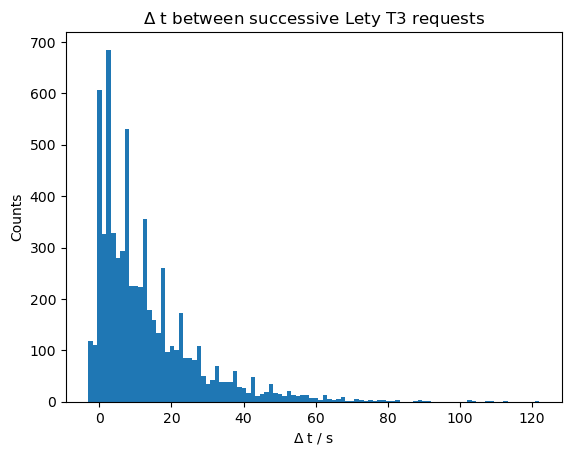

In [8]:
plt.hist(delta_ts, bins=100, label="All Lety T3 requests")
plt.xlabel(r"$\Delta$ t / s")
plt.ylabel("Counts")
plt.title(r"$\Delta$ t between successive Lety T3 requests")
plt.show()

In [9]:
min(delta_ts)

-3.0

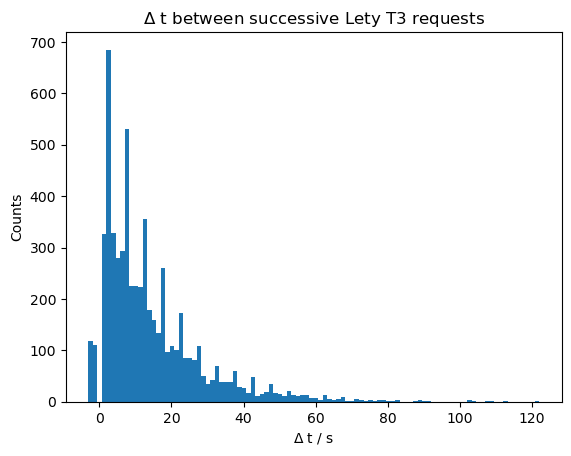

In [10]:
plt.hist(delta_ts_cutMulti, bins=100, label="Lety T3 requests (cut multi-triggers and large events)")
plt.xlabel(r"$\Delta$ t / s")
plt.ylabel("Counts")
plt.title(r"$\Delta$ t between successive Lety T3 requests")
plt.show()

In [11]:
# Don't know why there are negative time differences...

In [12]:
len(delta_ts_cutMulti), len(delta_ts)

(6058, 6664)

In [20]:
neg_delta_t_inds = np.where(np.array(delta_ts) < 0.0)

In [18]:
print(f"Lines {3} and {3+1} have a negative time difference: {data[3][0]}, {data[3+1][0]} "\
      f"and triggers {data[3][4]}, {data[3+1][4]}")

Lines 3 and 4 have a negative time difference: 1439251233, 1439251232 and triggers Fd, Xb


In [24]:
for i in range(len(neg_delta_t_inds[0])):
    ind = neg_delta_t_inds[0][i]
    print(f"Lines {ind} and {ind+1} have a negative time difference: {data[ind][0]}, {data[ind+1][0]} "\
          f"and triggers: {data[ind][4]}, {data[ind+1][4]}")

Lines 3 and 4 have a negative time difference: 1439251233, 1439251232 and triggers: Fd, Xb
Lines 38 and 39 have a negative time difference: 1439251658, 1439251657 and triggers: Fd, Xb
Lines 52 and 53 have a negative time difference: 1439251805, 1439251804 and triggers: XbFast, Xb
Lines 79 and 80 have a negative time difference: 1439252058, 1439252056 and triggers: XbFast, Xb
Lines 81 and 82 have a negative time difference: 1439252059, 1439252058 and triggers: XbFast, Xb
Lines 105 and 106 have a negative time difference: 1439252353, 1439252351 and triggers: XbFast, Xb
Lines 117 and 118 have a negative time difference: 1439252427, 1439252426 and triggers: XbFast, Fd
Lines 133 and 134 have a negative time difference: 1439252619, 1439252618 and triggers: XbFast, Xb
Lines 154 and 155 have a negative time difference: 1439252799, 1439252798 and triggers: XbFast, Fd
Lines 155 and 156 have a negative time difference: 1439252798, 1439252797 and triggers: Fd, Xb
Lines 190 and 191 have a negative 

In [29]:
float(data[0][1]) / 1e6

0.93545

In [30]:
data

array([['1439251216', '935450', '0', '20', 'XbFast'],
       ['1439251218', '96990', '-118', '30', 'Xb'],
       ['1439251228', '316874', '0', '0', 'XbFast'],
       ...,
       ['1439337603', '51307', '-44', '20', 'Fd'],
       ['1439337607', '18039', '0', '20', 'XbFast'],
       ['1439337607', '18164', '-124', '30', 'Xb']], dtype='<U10')

In [34]:
type(data), type(data[0]), data.shape

(numpy.ndarray, numpy.ndarray, (6665, 5))

In [ ]:
# Sort data by GPS time in seconds (column 0) and then by GPS microseconds (column 1)
sortedData = data[np.lexsort((data[:, 1], data[:, 0]))]

In [44]:
# Check it sorted correctly
sortedData[0:6], data[0:6]

(array([['1439251216', '935450', '0', '20', 'XbFast'],
        ['1439251218', '96990', '-118', '30', 'Xb'],
        ['1439251228', '316874', '0', '0', 'XbFast'],
        ['1439251232', '778634', '-124', '30', 'Xb'],
        ['1439251233', '641032', '-44', '20', 'Fd'],
        ['1439251233', '641116', '-122', '30', 'Xb']], dtype='<U10'),
 array([['1439251216', '935450', '0', '20', 'XbFast'],
        ['1439251218', '96990', '-118', '30', 'Xb'],
        ['1439251228', '316874', '0', '0', 'XbFast'],
        ['1439251233', '641032', '-44', '20', 'Fd'],
        ['1439251232', '778634', '-124', '30', 'Xb'],
        ['1439251233', '641116', '-122', '30', 'Xb']], dtype='<U10'))

In [ ]:
# Now recalculate successive time differences, correctly this time by accounting for microseconds
delta_ts_sorted = []
delta_ts_cutMulti_sorted = []
for i in range(1, len(sortedData)):
    t1 = float(sortedData[i][0]) + float(sortedData[i][1]) / 1e6
    t0 = float(sortedData[i-1][0]) + float(sortedData[i-1][1]) / 1e6
    delta_ts_sorted.append(t1 - t0)

    # One second was chosen arbitrarily, not sure what a good cut would be
    if delta_ts_sorted[-1] <= 1.0 and sortedData[i][4] == sortedData[i-1][4]:
        print(f"Lines {i} and {i-1} have similar timestamp and same trigger: {sortedData[i][0]}, {sortedData[i][4]}")
    elif delta_ts_sorted[-1] <= 1.0 and sortedData[i][4] != sortedData[i-1][4]:
        continue
    else:
        delta_ts_cutMulti_sorted.append(delta_ts_sorted[-1])

Lines 69 and 68 have similar timestamp and same trigger: 1439251969, Xb
Lines 88 and 87 have similar timestamp and same trigger: 1439252147, Fd
Lines 160 and 159 have similar timestamp and same trigger: 1439252844, XbFast
Lines 179 and 178 have similar timestamp and same trigger: 1439252998, XbFast
Lines 215 and 214 have similar timestamp and same trigger: 1439253482, Xb
Lines 222 and 221 have similar timestamp and same trigger: 1439253545, Xb
Lines 287 and 286 have similar timestamp and same trigger: 1439254468, Xb
Lines 336 and 335 have similar timestamp and same trigger: 1439255161, Xb
Lines 381 and 380 have similar timestamp and same trigger: 1439255751, Xb
Lines 468 and 467 have similar timestamp and same trigger: 1439257180, XbFast
Lines 543 and 542 have similar timestamp and same trigger: 1439258086, Xb
Lines 551 and 550 have similar timestamp and same trigger: 1439258138, XbFast
Lines 585 and 584 have similar timestamp and same trigger: 1439258621, XbFast
Lines 637 and 636 have

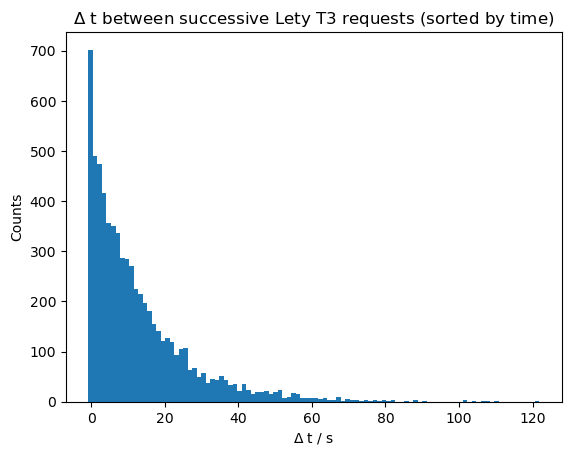

In [67]:
plt.hist(delta_ts_sorted, bins=100, label="All Lety T3 requests")
plt.xlabel(r"$\Delta$ t / s")
plt.ylabel("Counts")
plt.title(r"$\Delta$ t between successive Lety T3 requests (sorted by time)")
plt.show()

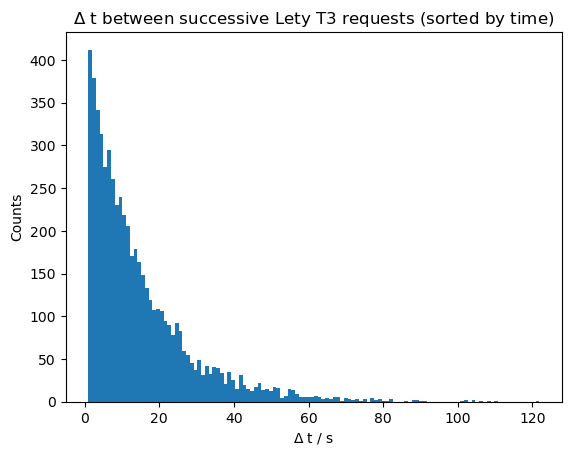

In [68]:
plt.hist(delta_ts_cutMulti_sorted, bins=120, label="Lety T3 requests (cut multi-triggers and large events)")
plt.xlabel(r"$\Delta$ t / s")
plt.ylabel("Counts")
plt.title(r"$\Delta$ t between successive Lety T3 requests (sorted by time)")
plt.show()

In [69]:
len(delta_ts_sorted), len(delta_ts_cutMulti_sorted)

(6664, 5751)

In [70]:
min(delta_ts_cutMulti_sorted)

1.001399040222168